Objectives:

Section 1: Data Analysis and Preprocessing
Are there any null values or outliers? How will you handle them?
Example:

1. Removing rows with outliers
2. Remove or impute missing values with a constant value (e.g., mean,
median)

Are there any variables that require type transformations?

What are the unique values in each column?

Are there any useful variables that you can engineer with the given data?
Example:

1. Variable Age in replacement of the variable Year_birth
2. Variable Revenue_generated as the total sum of the amount spent on the 6
product categories
3. Variable Total_Purchases by adding all the purchases features
4. Variable TotalAmount_Spent for each customer by adding all the Mnt*
features
5. Family variable as the sum of Kidhome + Teenhome + Marital_Status
Marital_Status can be imputed as {&#39;Divorced&#39;:1, &#39;Single&#39;:1, &#39;Married&#39;:2,
&#39;Together&#39;:2, &#39;Widow&#39;:1, &#39;YOLO&#39;:1, &#39;Alone&#39;:1, &#39;Absurd&#39;:1}
6. Variable Educationnal_years as the total number of years of education the
individual achieved according to its diploma
7. TotalCampaignsAcc as the total acceptance of advertising campaigns

 Section 02: Exploratory Data Analysis (EDA)

There are a number of different techniques that can be used in EDA, including:
1. Univariate analysis
2. Bivariate analysis
Univariate analysis: This involves analyzing individual variables to understand their distribution, central tendency, and variability. Common univariate analysis techniques include:

Descriptive statistics

Histogram

Boxplot

Bivariate analysis: This involves analyzing the relationship between two variables to identify patterns and trends. Common bivariate analysis techniques include:

Scatter plot

Correlation analysis

Section 03: Data Visualization

Plot and visualize the answers to the below questions.

Which marketing campaign is most successful?

Display the total amount spent by a customer in each product category.

What is the average spending in each age group?

Which products are performing best, and which are performing the least in terms of revenue? Analyze the data and plot a suitable graph to display a report on revenue generated by different products.

Which Country has the greatest number of customers who accepted the last campaign.

Bring together everything from Sections 01 to 03 and provide data-driven
recommendations/suggestions.

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns

import plotly.express as px
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preprocessing

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset Files/ifood_df_raw.csv")

In [ ]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [ ]:
data.shape

(2240, 28)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




*   Stripped white spaces from right and left of column's names.




In [ ]:
# Strip leading and trailing whitespace from all column names
data.columns = data.columns.str.strip()

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')



*   There are 24 null values in Income column.




In [ ]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776




*   Converted Dt_Customer dtype to datetime from object.



In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])



*   Converted Income's column dtype from obj to float.



In [ ]:
data['Income'] = data['Income'].str.replace('$', '').str.replace(',', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [ ]:
data['Income'].describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000



*   We can assume that yearly income generally depends on education. PhD fellows would earn more than people with basic education.

*   Country possibly makes a difference, too. People from countries with developed economy has more chances to earn more for the work. Also, education-level is generally stronger in such a countries.



*   So let's use median incomes for education and country groups of customers to impute missing income values.



In [ ]:
data['Income'] = data.groupby(['Education', 'Country'])['Income'].transform(lambda x: x.fillna(x.median()))




*   Unique values in each column.



In [ ]:
for column in data.columns:
  unique_values = data[column].unique()
  print(f"Unique values in column '{column}':")
  print(unique_values)
  print("\n")

Unique values in column 'ID':
[ 1826     1 10476 ...    22   528  4070]


Unique values in column 'Year_Birth':
[1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1893 1996 1995 1899 1943
 1941 1940 1900]


Unique values in column 'Education':
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


Unique values in column 'Marital_Status':
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


Unique values in column 'Income':
[84835. 57091. 67267. ... 46310. 65819. 94871.]


Unique values in column 'Kidhome':
[0 1 2]


Unique values in column 'Teenhome':
[0 1 2]


Unique values in column 'Dt_Customer':
<DatetimeArray>
['2014-06-16 00:00:00', '2014-06-15 00:00:00', '2014-05-13 00:00:00',
 '2014-05-11 00:00:00', '2014-04-08 00:00:00', '2014-03-17 00:00:00',
 '2014-0



*   Outliers in each column.





*   I retained all outliers because with a large sample, outliers are expected and more likely to occur. But each outlier has less of an effect on results when sample is large enough. The central tendency and variability of data won’t be as affected by a couple of extreme values when we have a large number of values.



In [ ]:
# Function to identify outliers based on IQR
def detect_outliers_iqr(data):
    outliers = {}
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Outlier condition
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

    return outliers

# Detect outliers in each column
outliers = detect_outliers_iqr(data)
for col, outliers_col in outliers.items():
    print(f"Outliers in column '{col}':")
    print(outliers_col)
    print()


Outliers in column 'ID':
Series([], Name: ID, dtype: int64)

Outliers in column 'Year_Birth':
513     1893
827     1899
2233    1900
Name: Year_Birth, dtype: int64

Outliers in column 'Income':
325     157146.0
497     160803.0
527     666666.0
731     162397.0
853     157733.0
1826    153924.0
1925    156924.0
2204    157243.0
Name: Income, dtype: float64

Outliers in column 'Kidhome':
Series([], Name: Kidhome, dtype: int64)

Outliers in column 'Teenhome':
Series([], Name: Teenhome, dtype: int64)

Outliers in column 'Recency':
Series([], Name: Recency, dtype: int64)

Outliers in column 'MntWines':
35      1285
38      1248
77      1285
152     1296
196     1462
222     1478
223     1478
376     1302
402     1239
472     1349
624     1308
722     1230
924     1332
1003    1253
1026    1394
1054    1276
1058    1288
1293    1493
1369    1311
1376    1486
1385    1492
1386    1492
1404    1259
1417    1241
1584    1245
1596    1459
1661    1379
1740    1285
1844    1298
1864    1315
1885

## Feature Engineering

In feature engineering we will make 8 new columns:




  1.  Customer Since Year : represents the year of enrollment of customer with the company.           
  2.  Customer Age: represents the age of customer.                  
  3.  Revenue Generated: represents the total revenue generated from 6  products categories.              
  4.  Total Purchases: represents the total purchases made from 5 purchase categories.               
  5.  Total Customer Spent: represents the total amount customer spent on the all mnt features.          
  6.  Customer Education: represents the total years of customer's education.             
  7.  Total Campaigns Acc: represents the total acceptance of advertising campaigns.         
  8.  Family Size: represents the total number of membersin the family.  






In [ ]:
data['Customer Since Year'] = data['Dt_Customer'].dt.year

In [ ]:
data['Customer Since Year'].describe()

,Customer Since Year
count,2240.000000
mean,2013.028125
std,0.684554
min,2012.000000
25%,2013.000000
50%,2013.000000
75%,2013.000000
max,2014.000000


In [ ]:
data['Customer Age'] = 2014 - data['Year_Birth']

In [ ]:
data['Customer Age'].describe()

,Customer Age
count,2240.000000
mean,45.194196
std,11.984069
min,18.000000
25%,37.000000
50%,44.000000
75%,55.000000
max,121.000000


In [ ]:
data['Revenue Generated'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [ ]:
data['Revenue Generated'].describe()

,Revenue Generated
count,2240.000000
mean,605.798214
std,602.249288
min,5.000000
25%,68.750000
50%,396.000000
75%,1045.500000
max,2525.000000


In [ ]:
data['Total Purchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumWebVisitsMonth']

In [ ]:
data['Total Purchases'].describe()

,Total Purchases
count,2240.000000
mean,20.178571
std,7.293275
min,0.000000
25%,14.000000
50%,19.000000
75%,25.000000
max,46.000000


In [ ]:
data['Total Customer Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [ ]:
data['Total Customer Spent'].describe()

,Total Customer Spent
count,2240.000000
mean,605.798214
std,602.249288
min,5.000000
25%,68.750000
50%,396.000000
75%,1045.500000
max,2525.000000


In [ ]:
data['Customer Education'] = data['Education'].map({'Basic': 12,'Graduation': 16,'Master': 18,'PhD': 20,'2n Cycle': 18})

In [ ]:
data['Customer Education'].describe()

,Customer Education
count,2240.000000
mean,17.283036
std,1.798783
min,12.000000
25%,16.000000
50%,16.000000
75%,18.000000
max,20.000000


In [ ]:
data['Total Campaigns Acc'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

In [ ]:
data['Total Campaigns Acc'].describe()

,Total Campaigns Acc
count,2240.000000
mean,0.446875
std,0.890543
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,5.000000


In [ ]:
data['Family Size'] = data['Teenhome'] + data['Kidhome'] + data['Marital_Status'].map({'Divorced': 1, 'Single': 1, 'Married': 2, 'Together': 2, 'Widow': 1, 'YOLO' : 1, 'Alone': 1, 'Absurd': 1})



In [ ]:
data['Family Size'].describe()

,Family Size
count,2240.000000
mean,2.595089
std,0.906959
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    2240 non-null   int64         
 1   Year_Birth            2240 non-null   int64         
 2   Education             2240 non-null   object        
 3   Marital_Status        2240 non-null   object        
 4   Income                2240 non-null   float64       
 5   Kidhome               2240 non-null   int64         
 6   Teenhome              2240 non-null   int64         
 7   Dt_Customer           2240 non-null   datetime64[ns]
 8   Recency               2240 non-null   int64         
 9   MntWines              2240 non-null   int64         
 10  MntFruits             2240 non-null   int64         
 11  MntMeatProducts       2240 non-null   int64         
 12  MntFishProducts       2240 non-null   int64         
 13  MntSweetProducts  

### **Univariate** **Analysis**



*   Histplot represents the distribution of all the numerical columns.



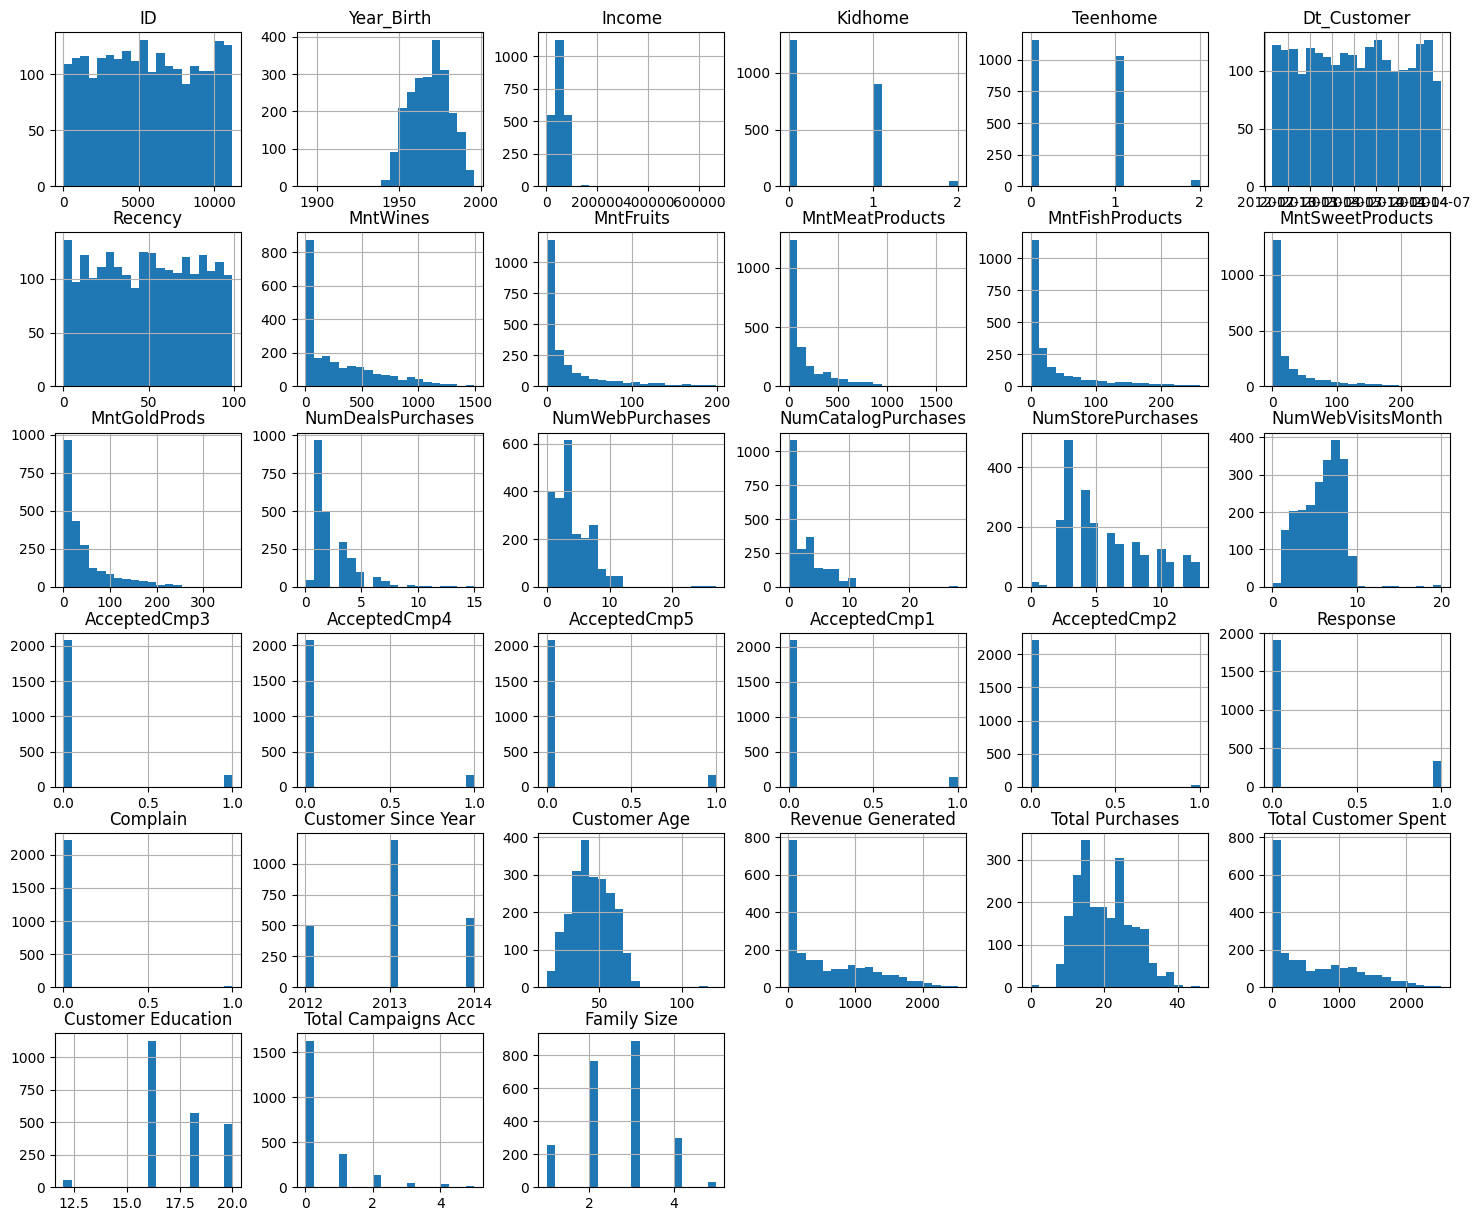

In [ ]:
import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(18, 15))
plt.show()




*   Countplot represents the distribution of all categorical columns.



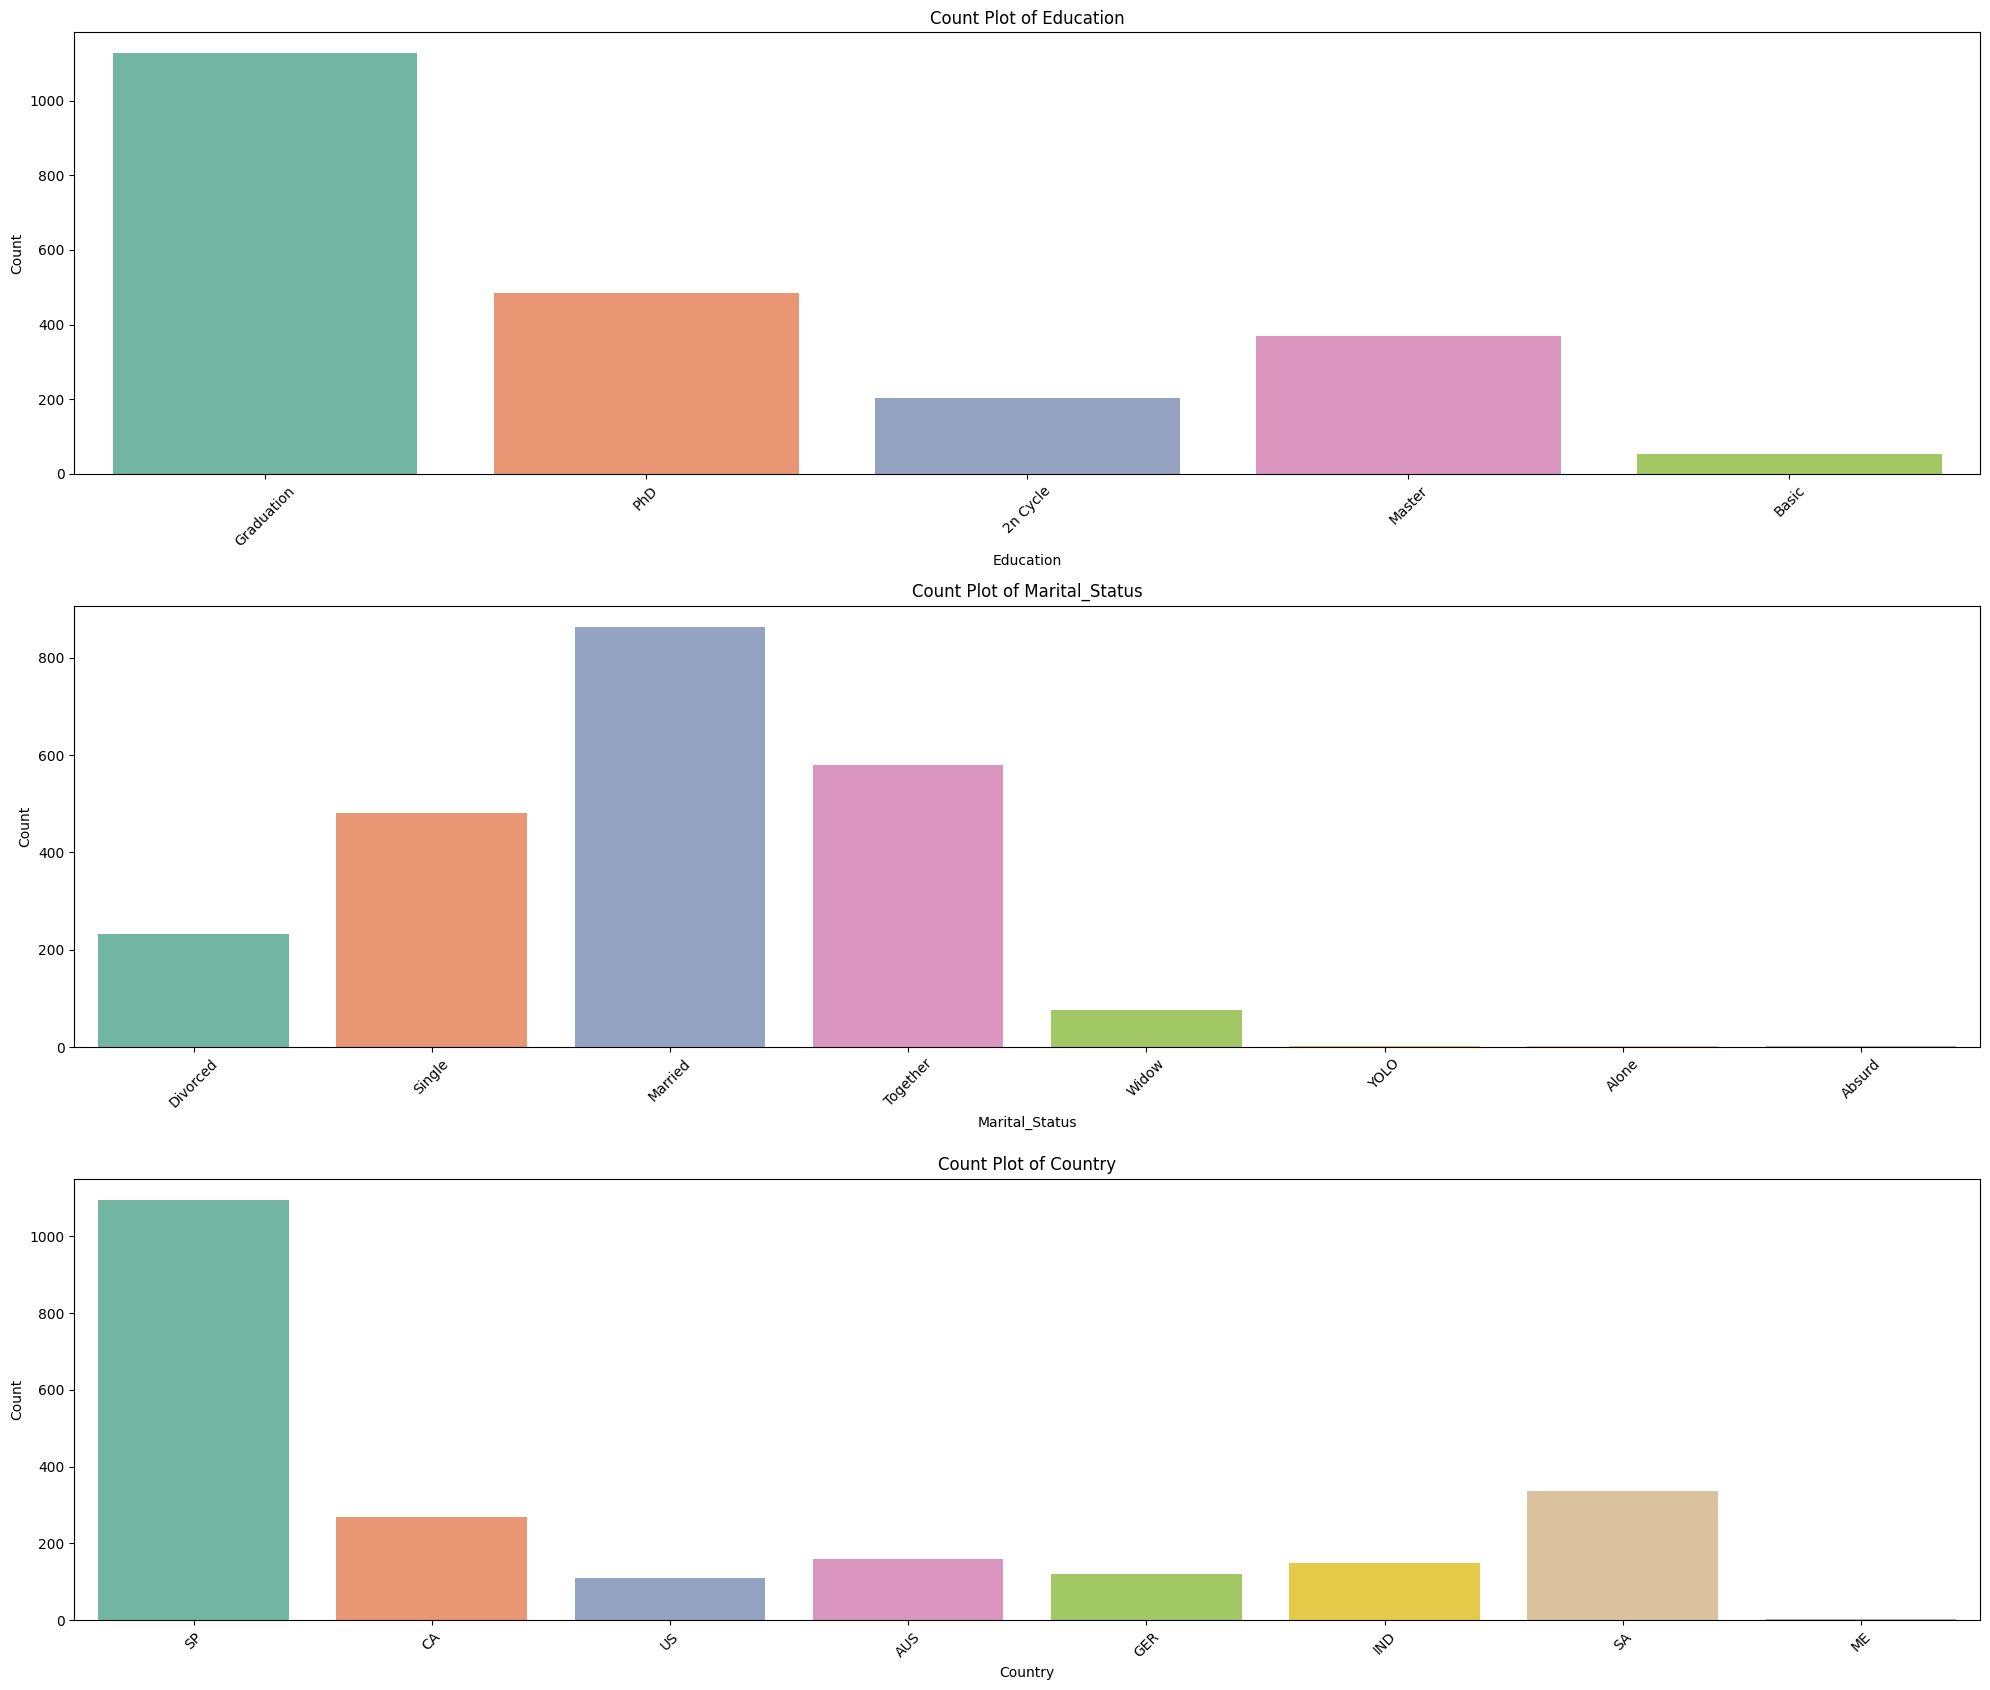

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features
categorical_features = ['Education', 'Marital_Status', 'Country']  # Replace with your categorical columns

# Plotting
plt.figure(figsize=(20, 17))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(x = feature, data=data, palette='Set2')
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate category labels for better readability

plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country',
       'Customer Since Year', 'Customer Age', 'Revenue Generated',
       'Total Purchases', 'Total Customer Spent', 'Customer Education',
       'Total Campaigns Acc', 'Family Size'],
      dtype='object')



*   Boxpot show the median and outliers in all numerical cols.



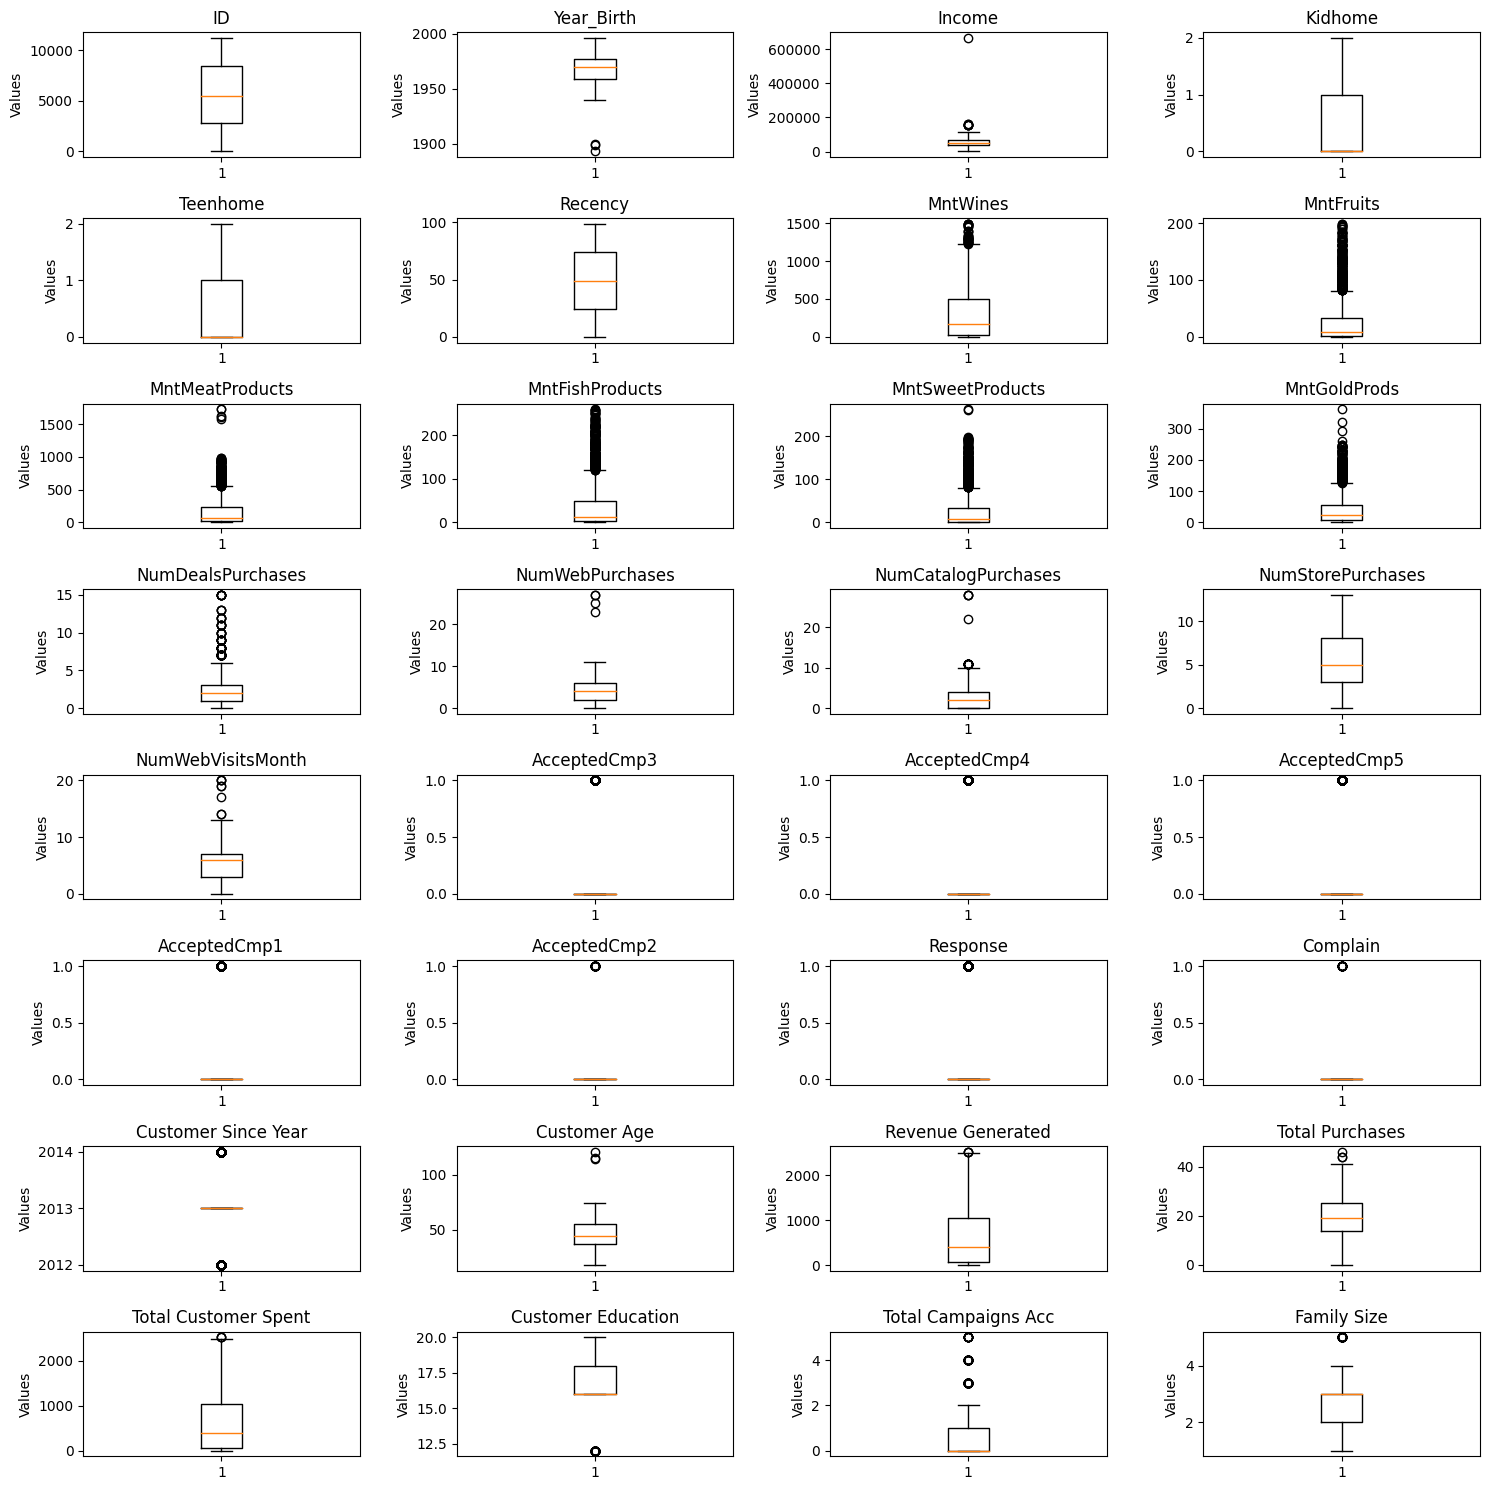

In [ ]:
num = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain',
       'Customer Since Year', 'Customer Age', 'Revenue Generated', 'Total Purchases',
       'Total Customer Spent', 'Customer Education', 'Total Campaigns Acc', 'Family Size']

# Calculate the number of subplots needed
n_cols = 4  # Number of columns in the plot grid
n_rows = (len(num) + n_cols - 1) // n_cols  # Number of rows required

# Create a figure for the box plots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over each column and create a box plot
for i, col in enumerate(num):
    ax = axes[i]
    ax.boxplot(data[col].dropna())  # Drop NaN values for plotting
    ax.set_title(col)
    ax.set_ylabel('Values')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Display the box plots
plt.tight_layout()
plt.show()

In [ ]:
num_data = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain',
       'Customer Since Year', 'Customer Age', 'Revenue Generated', 'Total Purchases',
       'Total Customer Spent', 'Customer Education', 'Total Campaigns Acc', 'Family Size']

## **Bivariate Analysis**

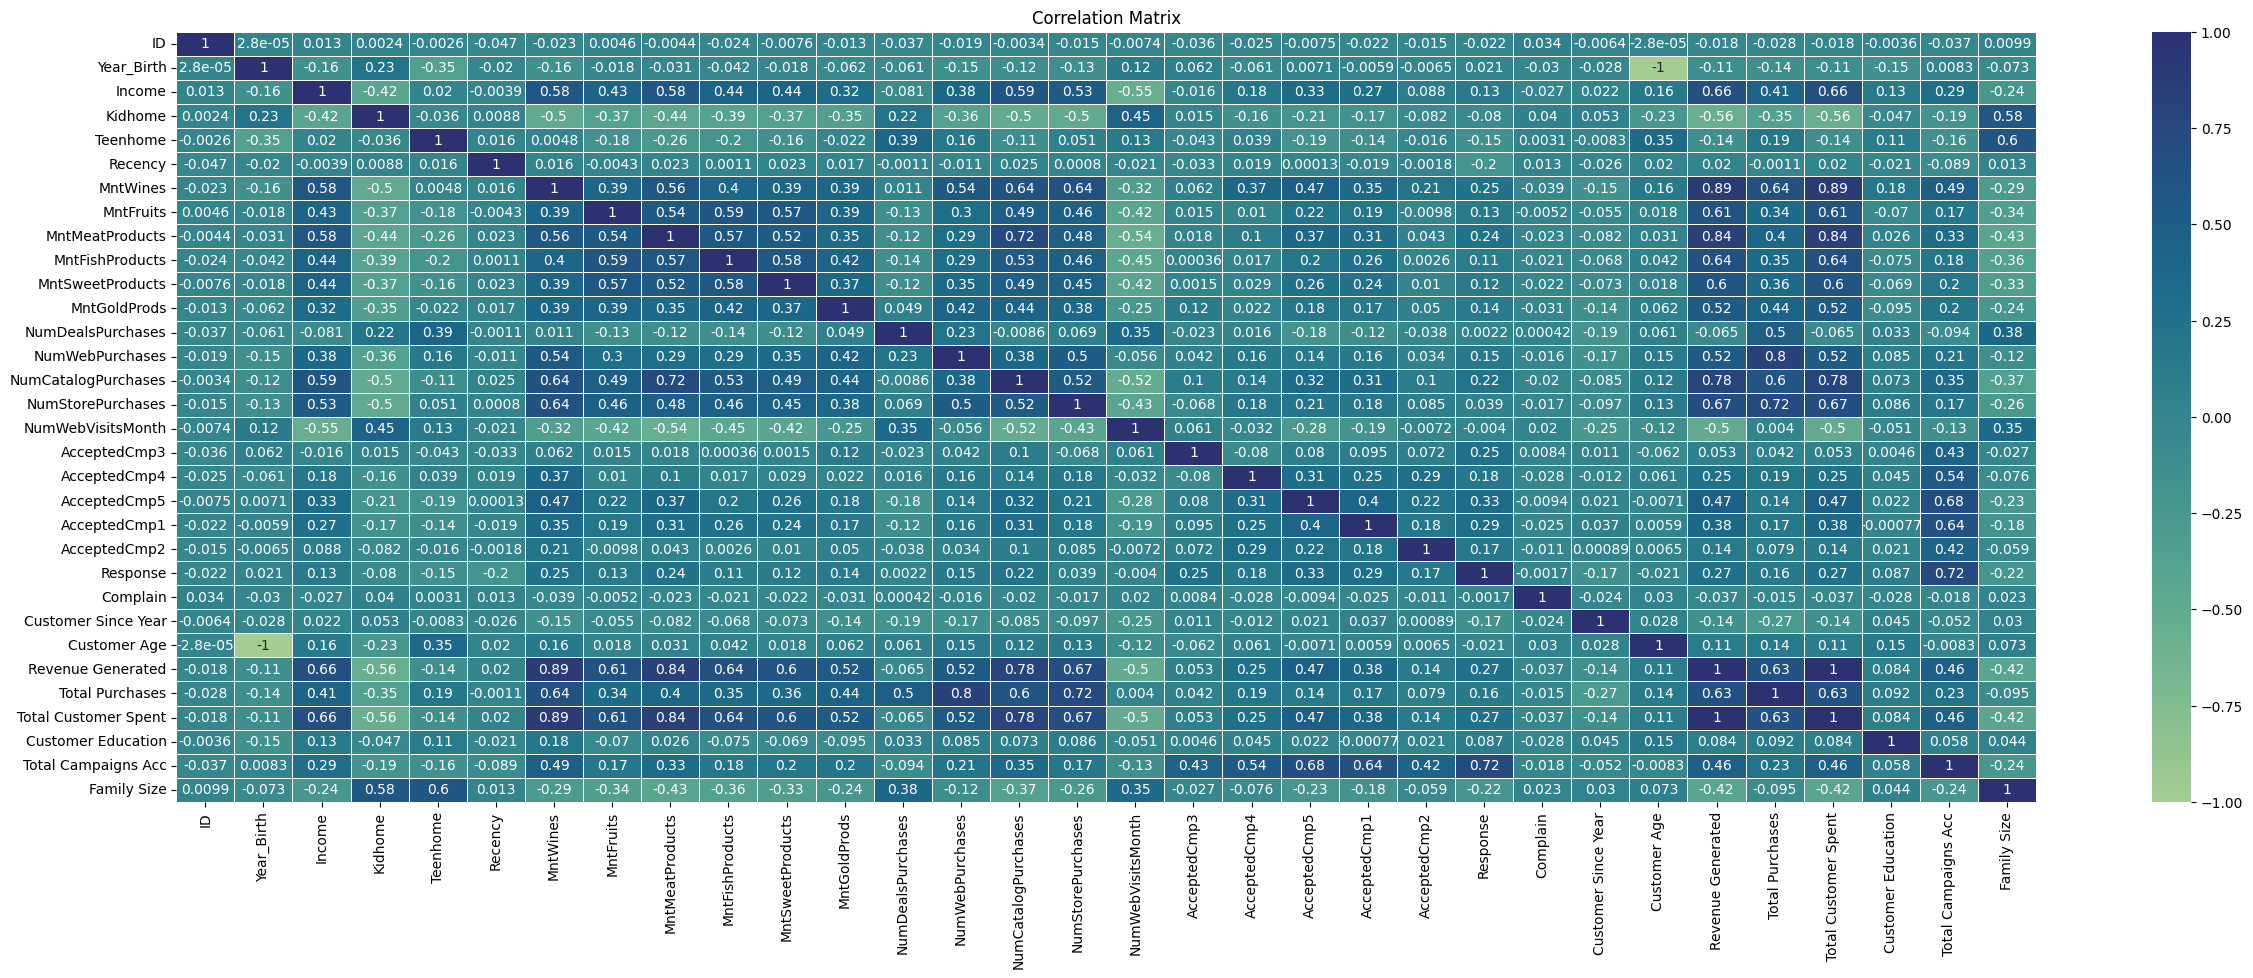

In [ ]:
correlation_matrix = data[num_data].corr()

plt.figure(figsize=(30,10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



*   Scatterplots show the revenue generated by all the other numerical cols.



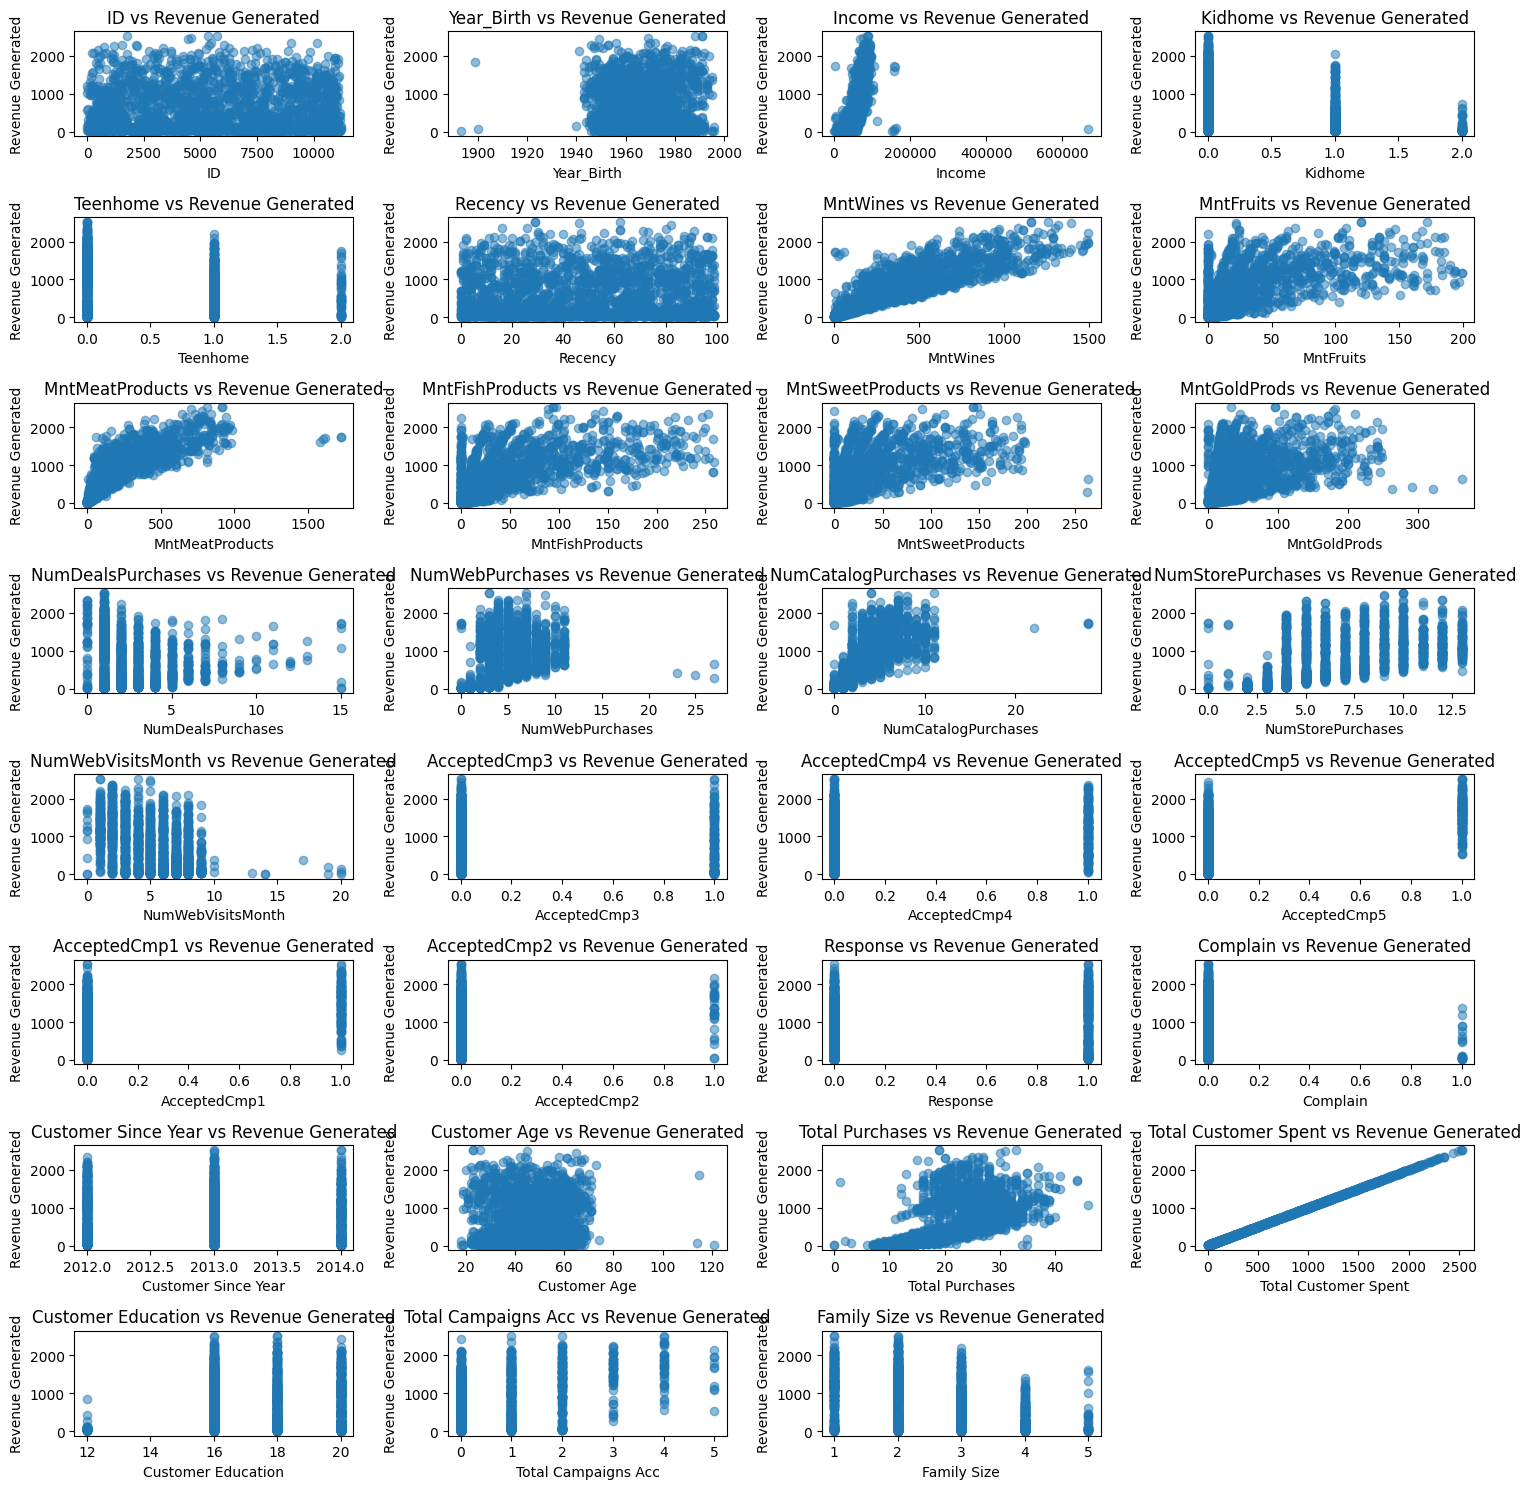

In [ ]:
num_data = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
            'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain',
            'Customer Since Year', 'Customer Age', 'Revenue Generated', 'Total Purchases',
            'Total Customer Spent', 'Customer Education', 'Total Campaigns Acc', 'Family Size']

# Remove target column from num_data to avoid self-plotting
num_data = [col for col in num_data if col != 'Revenue Generated']

# Calculate the number of subplots needed
n_cols = 4  # Number of columns in the plot grid
n_rows = (len(num_data) + n_cols - 1) // n_cols  # Number of rows required

# Create a figure for the scatter plots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over each column and create a scatter plot against 'Revenue Generated'
for i, col in enumerate(num_data):
    ax = axes[i]
    ax.scatter(data[col], data['Revenue Generated'], alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('Revenue Generated')
    ax.set_title(f'{col} vs Revenue Generated')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Display the scatter plots
plt.tight_layout()
plt.show()

##**Data Visualization**



*   Barplot shows which marketing campaign is most successful.


*   Last Campaign Response performed most well. After that comes cmp4. Cmp2 performs the worst.









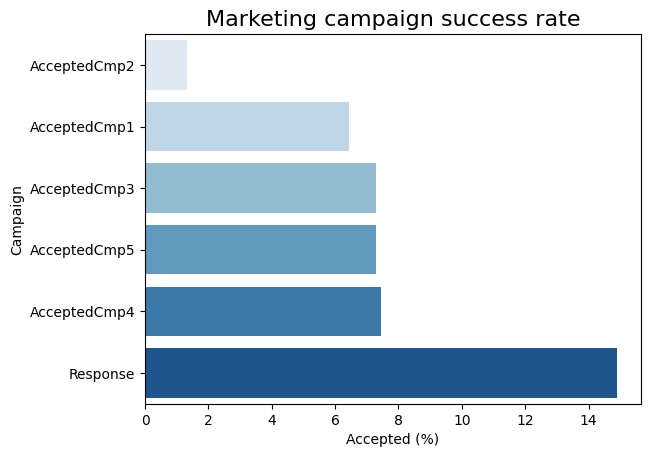

In [ ]:
# calculate success rate (percent accepted)
# calculate success rate (percent accepted)
camp_success = pd.DataFrame(data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100,
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=camp_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);



*   Barplot displays the total amount spent by a customer in each product category.
*   Customers spent the most in wine products after that comes meat products.



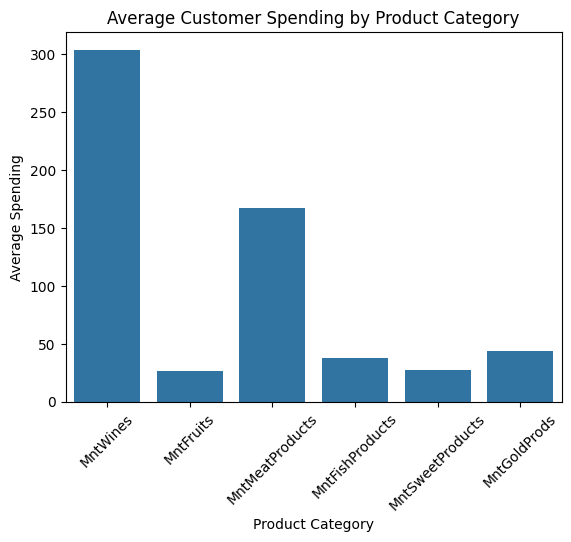

In [ ]:
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate average spending per category
average_spending = data[categories].mean()
average_spending_data = average_spending.reset_index()
average_spending_data.columns = ['Category', 'AverageSpending']

# Plot
sns.barplot(x='Category', y='AverageSpending', data=average_spending_data)
plt.xticks(rotation=45)
plt.title('Average Customer Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Spending')
plt.show()



*   Barplot displays average spending in each age group.
*   61+ age group spent the most followed by 51-60 with 31-40 age group spending the least.



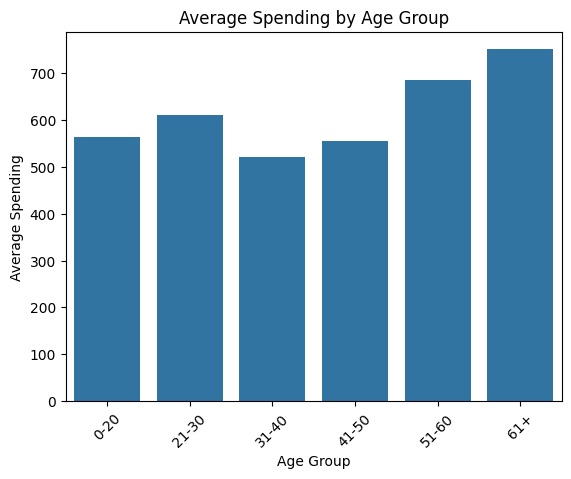

In [ ]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Create a new column 'AgeGroup'
data['AgeGroup'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)

# List of spending categories
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate total spending per customer
data['TotalSpending'] = data[categories].sum(axis=1)

# Calculate average spending per age group
average_spending_age_group = data.groupby('AgeGroup')['TotalSpending'].mean().reset_index()

# Plot
sns.barplot(x='AgeGroup', y='TotalSpending', data=average_spending_age_group)
plt.xticks(rotation=45)
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.show()



*   Maximum revenue is generated by wine products followed by meat products
with sweet and fruit products generating minimum revenue.


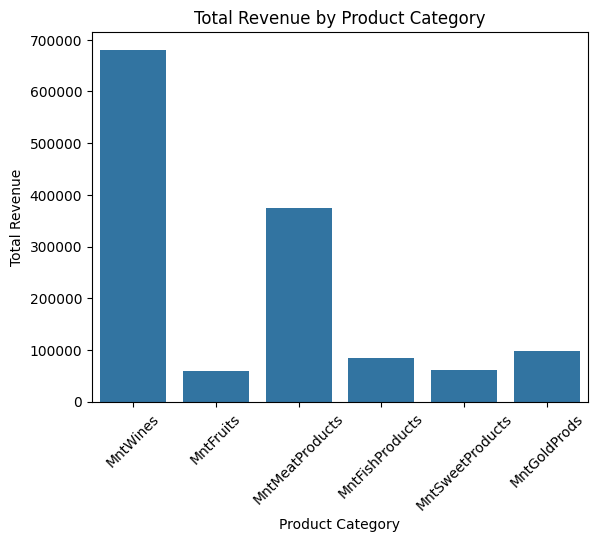

In [ ]:
revenue_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate total revenue per product category
total_revenue = data[revenue_columns].sum()
total_revenue_data = total_revenue.reset_index()
total_revenue_data.columns = ['ProductCategory', 'TotalRevenue']

# Plot
sns.barplot(x='ProductCategory', y='TotalRevenue', data=total_revenue_data)
plt.xticks(rotation=45)
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()



*   Barplot shows which Country has the greatest number of customers who accepted the last campaign.


*   Spain has maximum customers for last campaign folloed by South Africa. Mexico has the minimum customers for last campaign.





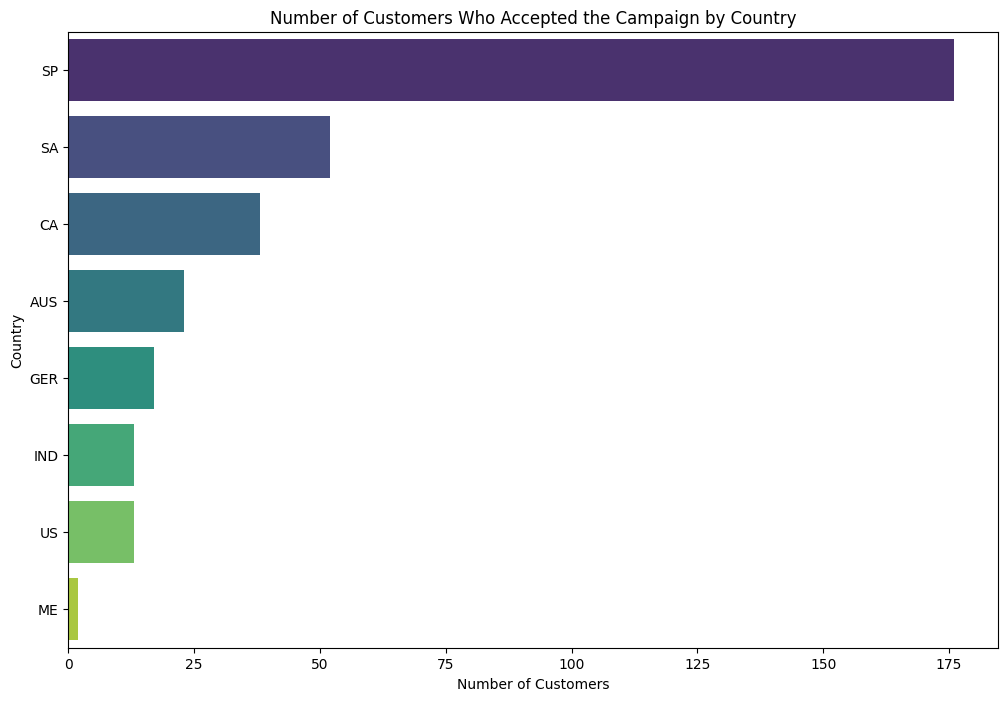

In [ ]:
accepted_customers = data[data['Response'] == 1]

# Count the number of accepted customers by country
country_counts = accepted_customers['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'NumberOfCustomers']

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='NumberOfCustomers', y='Country', data=country_counts, palette='viridis')
plt.title('Number of Customers Who Accepted the Campaign by Country')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()



*   Maximum Revenue is generated by Spain. While minimum revenue is generated by Mexico.



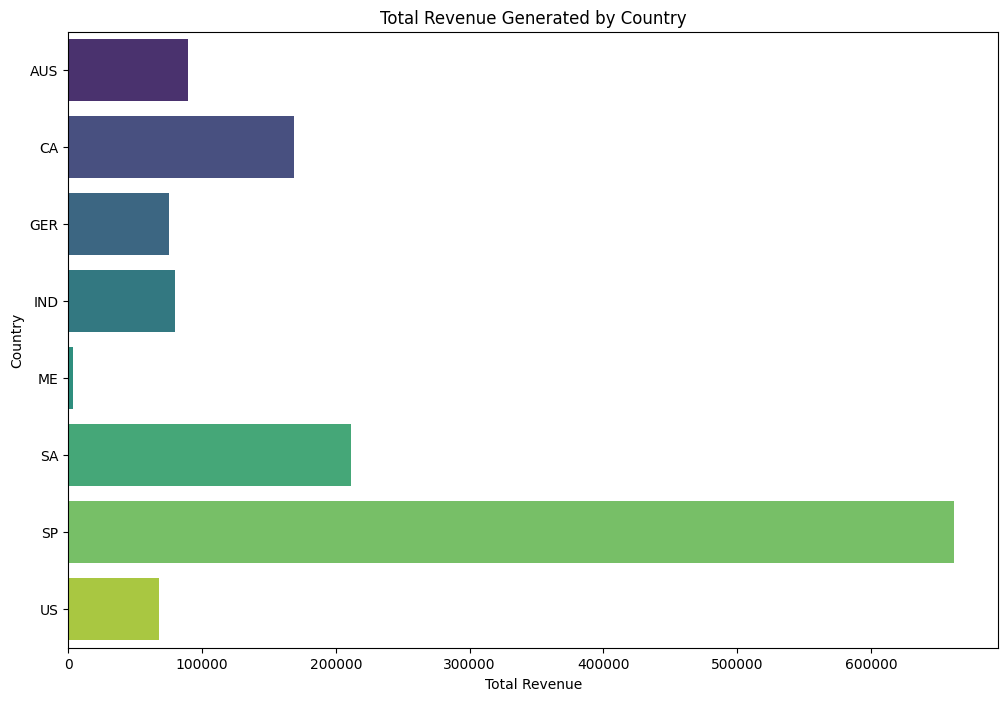

In [ ]:
revenue_by_country = data.groupby('Country')['Revenue Generated'].sum().reset_index()
revenue_by_country.columns = ['Country', 'TotalRevenue']

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalRevenue', y='Country', data=revenue_by_country, palette='viridis')
plt.title('Total Revenue Generated by Country')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()



*   Barplot shows the max purchases were made from store followed by from website monthly least purchases were made from deals and catalogs.



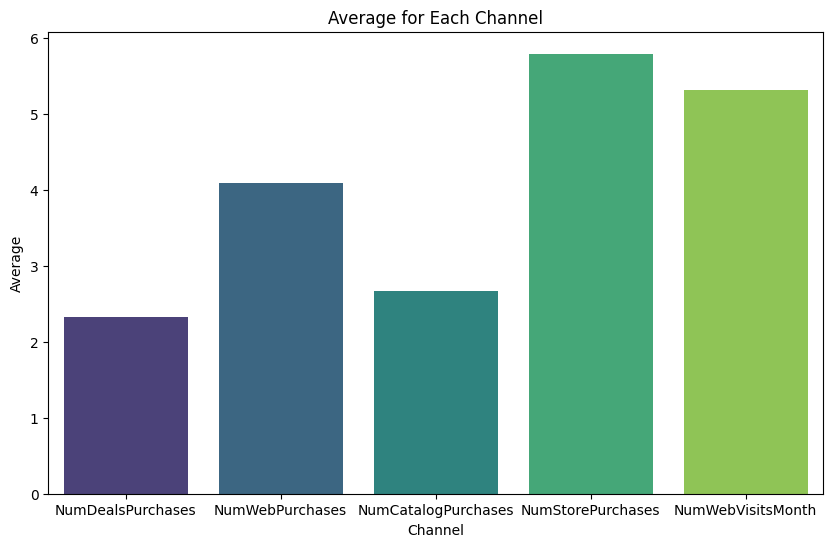

In [ ]:
channel_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Calculate the average for each channel
averages = data[channel_columns].mean().reset_index()
averages.columns = ['Channel', 'Average']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='Average', data=averages, palette='viridis')
plt.title('Average for Each Channel')
plt.xlabel('Channel')
plt.ylabel('Average')
plt.show()

## Recommendations



1. The most successful advertising campaign was the most recent campaign (column name: Response), and was particularly successful in Spain (>60% acceptance rate!).

2. Conduct future advertising campaigns using the same model recently implemented in Spain.

3. Advertising campaign acceptance is positively correlated with income and negatively correlated with having kids/teens.

4. Create two streams of targeted advertising campaigns, one aimed at high-income individuals without kids/teens and another aimed at lower-income individuals with kids/teens.

5. The most successful products are wines and meats (i.e. the average customer spent the most on these items).

6. Focus advertising campaigns on boosting sales of the less popular items.

7. The underperforming channels are deals and catalog purchases (i.e. the average customer made the fewest purchases via these channels).

8. The best performing channels are web and store purchases (i.e. the average customer made the most purchases via these channels).

9. Focus advertising campaigns on the more successful channels, to reach more customers.

